<a href="https://colab.research.google.com/github/Lucy-wo/API-Challenge/blob/master/23_891_SiyuWo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 891: Individual Assignment

Version 1: Updated February 4, 2024

<font color='red'>\# TODO: fill in the below</font>

- First name, Last name: Siyu, Wo
- Student number: 20254565
- Section number: 01
- Favorite book: One Day
- Date: 2024-04-13

# Assignment Instructions

This assignment contains two (2) questions and one (1) optional question for bonus marks. The questions and parts are wholly contained in this Google Colab Notebook.

You are to make a copy of this Notebook and edit the copy to provide your answers/solutions. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

## Questions

Each question has multiple tasks. There are two types of tasks: tasks that require you to write code and tasks that require you to write text responses.

For tasks that require **code**:
- Use Python to complete the task.
- You may use standard Python libraries, including scikit-learn, pandas,  numpy, transformers, and simpletransformers.
- Tips:
  - Submit code that runs without errors.
  - Submit code that is reproducible. E.g., set random number seeds as appropriate. You should be able to run your code again and again and again, from the top of the file to the bottom of the file, and get the exact same results each time. I should be able to run your code, from scratch, again and again, and get the exact same results that you get.
  - Submit code that is organized. Make your code readable. Provide comments to describe what the code is doing and why. Don’t leave “old” code lying around. Overall, if your code is clear and easy to read, then we will be happy. When we are happy, we give better marks.

For tasks that require **text responses**:
- Type your response in Notebook cell indicated.
- Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly verbose.
- Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).
- You may refer to your code in your answer. Please do so very clearly. E.g., “As can be seen in on line X above …“


## What to Submit to the Course Portal

- You are to export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook (.ipynb) file to the course portal.
- Please submit the PDF export of the Notebook.
   - Please name the PDF file 23_891_FirstnameLastName.pdf
      - E.g., *23_891_StephenThomas.pdf*
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF, click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2024-04-22 02:35:50.460765


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.10.12


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.4 MB/s eta 0:00:00


In [7]:
!pip install transformers

In [8]:
# TODO: install any packages you need to here. For example:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('wordnet')
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, ShuffleSplit
from sklearn.pipeline import Pipeline
from transformers import pipeline as ppl

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Question 1: Sentiment Analysis via Shallow ML


**Marking**

The coding parts (i.e., 1.a, 1.b, 1.c4) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 2 and 3 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


In [9]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [10]:
# DO NOT MODIFY THIS CELL

# Next, we'll split it into training and test
from sklearn.model_selection import train_test_split

X = df['Sentence']
y = df['Polarity']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

## Part 1.a: Preprocessing and FE Pipeline

Clean and preprocess the data (i.e., `X_train`) as you see necessary. Extract features from the text (i.e., vectorization using BOW and/or Bag of N-Grams and/or topics and/or lexical features).


In [11]:
# Define a preprocess function
stop_words = set(stopwords.words('english') + stopwords.words('spanish'))
lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Case normalization
    x = x.lower()

    # Remove punctuation (characters)
    x = re.sub(r'[^\w\s]', '', x)

    # Remove non-unicode
    x = unidecode.unidecode(x)

    # Remove numbers
    x = re.sub(r'\d+', '', x)

    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x)

# apply preprocess function to X_train and X_val
X_train = X_train.apply(preprocess)
X_val = X_val.apply(preprocess)

<ipython-input-11-40a9cce56b92>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  x = BeautifulSoup(x, "lxml").get_text()
<ipython-input-11-40a9cce56b92>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  x = BeautifulSoup(x, "lxml").get_text()


In [12]:
X_train[0:3]

2072    crackle unpredictable youthful energy honestly...
630     four star food guy blue shirt great vibe still...
963     rave review couldnt wait eat herewhat disappoi...
Name: Sentence, dtype: object

In [13]:
#Tokenization by using BOW - TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    # ignore terms that appear in less than 1% of the documents".
    min_df=.01,
    # ignore terms that appear in more than 95% of the documents
    max_df=.95,
    ngram_range=(1,5))
%time dtm_tfidf = tfidf_vectorizer.fit_transform(X_train)

bow_df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=X_train.index)
bow_df_tfidf.shape

X_train_bow_tfidf = pd.concat([X_train, bow_df_tfidf], axis=1)
X_train_bow_tfidf.drop(columns=['Sentence'], inplace=True)
print(X_train_bow_tfidf.shape)
X_train_bow_tfidf.head()

CPU times: user 48.8 ms, sys: 5.25 ms, total: 54.1 ms
Wall time: 69.9 ms
(1800, 81)


,also,amazing,back,bad,battery,best,better,came,cant,case,...,use,used,waste,way,well,wont,work,worst,would,year
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58451,0.0
2185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [14]:
# Apply tikenization to X_val
%time dtm_tfidf = tfidf_vectorizer.fit_transform(X_val)

bow_df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=X_val.index)
bow_df_tfidf.shape

X_val_bow_tfidf = pd.concat([X_val, bow_df_tfidf], axis=1)
X_val_bow_tfidf.drop(columns=['Sentence'], inplace=True)
print(X_val_bow_tfidf.shape)
X_val_bow_tfidf.head()

CPU times: user 29.3 ms, sys: 885 µs, total: 30.2 ms
Wall time: 31.4 ms
(600, 100)


,also,amazing,another,back,bad,battery,best,better,call,came,...,want,waste,way,well,went,work,worked,worst,would,year
2037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345699,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.551646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 1.b: Model Training/Tuning/Cross Validation

Use your favorite shallow ML algorithm (such as decision trees, KNN, random forest, boosting variants) to train a classification model.  Don’t forget everything we’ve learned in the machine learning course: hyperparameter tuning, cross-validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing model that you can.


In [15]:
# Defining and Assessing Pipelines
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5, random_state=0)

pipe1 = Pipeline(steps=[
                        ("clf", clf1)
                        ])

scores = cross_val_score(pipe1, X_train_bow_tfidf, y_train, cv=10, scoring="f1_macro")


with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

CV scores: [ 0.554  0.571  0.611  0.583  0.482  0.631  0.600  0.651  0.609  0.582]
Estimated F1 Score: 0.587 +/- 0.04


In [16]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=0)

pipe2 = Pipeline(steps=[
                        ('imputer', SimpleImputer()),
                        ('scaler', StandardScaler()),
                        ("clf", clf2),
                        ])

scores = cross_val_score(pipe2, X_train_bow_tfidf, y_train, cv=10, scoring="f1_macro")

with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

CV scores: [ 0.619  0.605  0.626  0.632  0.577  0.707  0.653  0.708  0.660  0.605]
Estimated F1 Score: 0.639 +/- 0.04


In [17]:
clf3 = RandomForestClassifier(random_state=0)

pipe3 = Pipeline(steps=[
                        ('imputer', SimpleImputer()),
                        ('scaler', StandardScaler()),
                        ("clf", clf3),
                        ])

scores = cross_val_score(pipe3, X_train_bow_tfidf, y_train, cv=10, scoring="f1_macro")

with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print("CV scores: {}".format(scores))
print("Estimated F1 Score: {:0.3f} +/- {:0.2f}".format(np.mean(scores), np.std(scores)))

CV scores: [ 0.701  0.661  0.610  0.648  0.618  0.694  0.683  0.689  0.721  0.688]
Estimated F1 Score: 0.671 +/- 0.03


In [18]:
 # Comparing Different Validation Techniques - using validation dataset

pipes = [("pipe1", pipe1), ("pipe2", pipe2), ("pipe3", pipe3)]
for pipe_name, pipe in pipes:

  for k in [2, 5, 10]:
    scores = cross_val_score(pipe, X_val_bow_tfidf, y_val, cv=k, scoring="f1_macro")
    print("{}, K={:3d} CV, F1 Score: {:0.3f} +/- {:0.2f}".format(pipe_name, k, np.mean(scores), np.std(scores)))

  for k in [2, 5, 10]:
    splitter = RepeatedKFold(n_splits=k, n_repeats=10, random_state=62)
    scores = cross_val_score(pipe, X_val_bow_tfidf, y_val, cv=splitter, scoring="f1_macro")
    print("{}, K={:3d} CV Repeated, F1 Score: {:0.3f} +/- {:0.2f}".format(pipe_name, k, np.mean(scores), np.std(scores)))


  for k in [2, 5, 10]:
    splitter = ShuffleSplit(n_splits=k, random_state=62)
    scores = cross_val_score(pipe, X_val_bow_tfidf, y_val, cv=splitter, scoring="f1_macro")
    print("{}, K={:3d} Shuffle, F1 Score: {:0.3f} +/- {:0.2f}".format(pipe_name, k, np.mean(scores), np.std(scores)))

pipe1, K=  2 CV, F1 Score: 0.583 +/- 0.01
pipe1, K=  5 CV, F1 Score: 0.590 +/- 0.05
pipe1, K= 10 CV, F1 Score: 0.609 +/- 0.06
pipe1, K=  2 CV Repeated, F1 Score: 0.570 +/- 0.04
pipe1, K=  5 CV Repeated, F1 Score: 0.578 +/- 0.05
pipe1, K= 10 CV Repeated, F1 Score: 0.598 +/- 0.06
pipe1, K=  2 Shuffle, F1 Score: 0.623 +/- 0.05
pipe1, K=  5 Shuffle, F1 Score: 0.651 +/- 0.04
pipe1, K= 10 Shuffle, F1 Score: 0.631 +/- 0.07
pipe2, K=  2 CV, F1 Score: 0.612 +/- 0.02
pipe2, K=  5 CV, F1 Score: 0.641 +/- 0.05
pipe2, K= 10 CV, F1 Score: 0.637 +/- 0.05
pipe2, K=  2 CV Repeated, F1 Score: 0.605 +/- 0.04
pipe2, K=  5 CV Repeated, F1 Score: 0.633 +/- 0.05
pipe2, K= 10 CV Repeated, F1 Score: 0.634 +/- 0.06
pipe2, K=  2 Shuffle, F1 Score: 0.623 +/- 0.07
pipe2, K=  5 Shuffle, F1 Score: 0.667 +/- 0.06
pipe2, K= 10 Shuffle, F1 Score: 0.651 +/- 0.08
pipe3, K=  2 CV, F1 Score: 0.628 +/- 0.01
pipe3, K=  5 CV, F1 Score: 0.661 +/- 0.03
pipe3, K= 10 CV, F1 Score: 0.675 +/- 0.06
pipe3, K=  2 CV Repeated, F1 Score


The best model is pipe3 - RandomForestClassifier, K=5 Shuffle, F1 Score is 0.708 +/- 0.06

In [19]:
# Tune using 5-fold cv on train data for RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'max_depth': [10,50,100],
              'min_samples_split': [2, 5, 10, 20]}
base_estimator = RandomForestClassifier(random_state=0)

sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(X_train_bow_tfidf, y_train)


print(sh.best_estimator_)
print("CV Score",sh.best_score_)


RandomForestClassifier(max_depth=50, min_samples_split=20, n_estimators=24,
                       random_state=0)
CV Score 0.6783333333333333


## Part 1.c: Model Assessment

Use your model to predict the sentiment of the testing data. Measure the performance (e.g., accuracy, AUC, F1-score) of your model.

In [20]:
# DO NOT MODIFY THIS CELL

test_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1taoTluPBUMt9JkKAnlqDTrU49DJFpJGW")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [21]:
# Assign the test dataset's X and y
X_test = test_df['Sentence']
y_test = test_df['Polarity']

In [22]:
X_test.shape
X_test.head()

0    A good commentary of today's love and undoubte...
1    For people who are first timers in film making...
2    It was very popular when I was in the cinema, ...
3    It's a feel-good film and that's how I felt wh...
4    It has northern humour and positive about the ...
Name: Sentence, dtype: object

In [23]:
X = pd.concat([X_test,X_train])
X.head()

0    A good commentary of today's love and undoubte...
1    For people who are first timers in film making...
2    It was very popular when I was in the cinema, ...
3    It's a feel-good film and that's how I felt wh...
4    It has northern humour and positive about the ...
Name: Sentence, dtype: object

In [24]:
# Test data preprocessing - apply preprocess function to X
X = X.apply(preprocess)

# Test data preprocessing - apply tikenization to X
%time dtm_tfidf = tfidf_vectorizer.fit_transform(X)

bow_df_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=X.index)
bow_df_tfidf.shape

X__bow_tfidf = pd.concat([X, bow_df_tfidf], axis=1)
X__bow_tfidf.drop(columns=['Sentence'], inplace=True)
print(X__bow_tfidf.shape)
X__bow_tfidf.head()

<ipython-input-11-40a9cce56b92>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  x = BeautifulSoup(x, "lxml").get_text()


CPU times: user 76.7 ms, sys: 2.97 ms, total: 79.7 ms
Wall time: 83.6 ms
(2400, 83)


,acting,actor,also,amazing,back,bad,battery,best,better,cant,...,two,use,waste,way,well,wont,work,worst,would,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_test = X__bow_tfidf[:600]
X_train = X__bow_tfidf[600:]

In [26]:
clf = RandomForestClassifier(max_depth=50, min_samples_split=20, n_estimators=24,
                       random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predicted Acc." , round(accuracy_score(y_test, y_pred),2))

Predicted Acc. 0.62


In [27]:
confusion_matrix(y_test, y_pred)

array([[251,  36],
       [194, 119]])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.87      0.69       287
           1       0.77      0.38      0.51       313

    accuracy                           0.62       600
   macro avg       0.67      0.63      0.60       600
weighted avg       0.67      0.62      0.59       600



## Part 2: Given the performance of your model, are you satisfied with the results? Explain.

According to the results, RandomForestClassifier, K=5 Shuffle, has the best model performance. Its F1 Score for the validation dataset is 0.708 +/- 0.06, and for the testing dataset, it is 0.6 +/- 0.05. The performance is not very good overall.

Since the F1 score integrates recall and precision into a single statistic, that is why I am using it. Because we don't know a lot about the cost or the losses from alpha and beta errors. We would have been able to represent the result more effectively if we had known the cost matrix. For the time being, we prefer to evaluate the model using the combined metric.

When recall and precision are both high or low, F1 will also be high or low. F1 will be low if one is high and the other is low. F1 provides a fast means of determining whether the classifier is truly proficient in class identification, or if it is simply taking shortcuts (e.g., classifying everything as a member of a big class).

TODO: Insert answer here.

## Part 3: Show five test instances in which your model was incorrect. Dive deep and find out why your model was wrong.

Keep your response to 1000 characters or less.

In [29]:
# Identify 5 indices of incorrect predictions
incorrect_predictions = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]

print("\nFive incorrect predictions:")
for i in incorrect_predictions[:5]:
    print(f"Instance {i}: Predicted={y_pred[i]}, Actual={y_test[i]}, Features={X[i]}")


Five incorrect predictions:
Instance 3: Predicted=0, Actual=1, Features=3                 feelgood film thats felt came cinema
3    stopped late may bank holiday rick steve recom...
Name: Sentence, dtype: object
Instance 4: Predicted=0, Actual=1, Features=4    northern humour positive community represents
4                       selection menu great price
Name: Sentence, dtype: object
Instance 5: Predicted=0, Actual=1, Features=5                 rather enjoyed
5    getting angry want damn pho
Name: Sentence, dtype: object
Instance 6: Predicted=0, Actual=1, Features=6                         liked
6    honeslty didnt taste fresh
Name: Sentence, dtype: object
Instance 8: Predicted=0, Actual=1, Features=8    really created unique feeling though
8                               fry great
Name: Sentence, dtype: object


Due to the text's confusing or deceptive terms and the intricacy of the language, the model most likely made these inaccurate predictions. In phrase 5, for instance, the text reads, "getting angry want damn pho." While the sentence does sound angry and positive, it is more positive because the client wants to eat the pho, indicating that they like it.

# Question 2: Conceptual Understanding of the SOTA


**Marking**

The following questions will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


## Part 1: What is transfer learning and fine-tuning in NLP? What advantages does it have over training from scratch?

Keep your response to 1000 characters or less.

Transfer learning and fine-tuning are components of the pre-trained model, which can be utilized to work on new tasks using smaller datasets after learning characteristics from larger datasets.

1.   Transfer learning could use of the knowledge gained while solving one problem and applying it to a different but related problem. For example, if I know how to cycle, if I can apply to drive a motorcycle. So transfer learning will use the existing knowledge that the existing model has trained on the Neural Net such as the feature extraction, to apply to our application. By changing the prediction layer along. Overall, we are freezing the convolutional and max-pooling layers so that do not modify their weights and retrain the fully connected part
2.   Fine-tunning is more flexible than transfer learning; It initially changes the last later to match the classes in our data, which is as transfer learning. But we cab also retrain the layers of the network in the feature extraction part as we as we desire to perform. In other words, the convolutional and pooling layers can also be retrained; So we can start with the transfer learning and if needed perform the Fine-tunning
**Advantages:**
* Transfer learning, in which we use our understanding of one problem to address another by optimizing the feature extraction phase and refining the classification phase as we go.
*  Utilizing a pre-trained model takes fewer data and computational resources than training from scratch because it has already been trained on a sizable dataset. This results in a reduction of both training time and resource requirements.
* superior Performance: When a pre-trained model has been trained on a sizable and varied dataset from major corporations, transfer learning frequently results in superior performance. Pre-trained models picked up universal language traits and patterns that are applicable to a variety of jobs. However, there's a chance that training models from the search will take a while and contain some blunders.
*   Efficient Utilization of Limited Data: By fine-tuning, the model can take advantage of the pre-trained model's expertise, which increases its efficacy in tasks when there is a shortage of training data. This is especially useful for activities that make it difficult to gather a lot of annotated data.   All things considered, using the trained models can greatly enhance their performance, which may be able to overcome the problems with the current workforce management approach. Our productivity indicator is inadequate for assessing individual officer performance, which is crucial for coaching purposes, and there are prospects for efficiency development. Legacy is exaggerated at the business level.

## Part 2: What is a Large Language Model (LLM) and what are their strengths and weaknesses?

Keep your response to 1000 characters or less.

Large Language Models, or LLMs for short, are machine learning models that can understand and produce language. Its base is a transformer, a type of neural network. The model architecture and the training datasets are both quite large. Users can enter text and receive output text based on the patterns and language that the LLM has learned. A prompt is a text input piece, and getting the desired outcome from the LLM depends on how it is designed.

**Strengths:**
*   LLM may be used to accomplish a variety of tasks with remarkable results, including conversation, copywriting, translation, summarization, and code production.
*   Quick and efficient, we use the LLM to finish a few everyday tasks quickly.
*   It is simple to use.

**Weaknesses:**
*   Incorrect answers due to its ability to predict the next syntactically correct word without true understanding;
*   Potential misuse for malicious tasks, generate false narratives or factually incorrect answers. Such as leaking private information or involve some illegal activities;
*   The code generate may appear bugs and require extra manual adjustment
*   Because humans are biased resulting the dataset used to train the LLM may also be biased, bias may be present in LLM results.

# Question 3 (Optional/Bonus): Sentiment Analysis via Deep ML

This question is optional and is worth up to 5 extra credit marks.

Use deep learning (e.g., RNNs and variants, CNNs and variants, and/or transformers) to build a model on the same dataset as Q1 and compare the results with the Shallow ML model.

You may train your own deep ML model (using, e.g., the keras library) or fine-tune a pretrained deep ML model (using, e.g., the transformers library and the Huggingface ecoystem).

In [30]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")

X = df['Sentence']
y = df['Polarity']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [31]:
classification = ppl('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [32]:
# use transformer to predict
predictions = classification(X_train.to_list())
predictions[:10]

[{'label': 'NEGATIVE', 'score': 0.99800044298172},
 {'label': 'POSITIVE', 'score': 0.99985671043396},
 {'label': 'NEGATIVE', 'score': 0.9996861219406128},
 {'label': 'NEGATIVE', 'score': 0.9814215898513794},
 {'label': 'NEGATIVE', 'score': 0.9911366701126099},
 {'label': 'NEGATIVE', 'score': 0.9997941851615906},
 {'label': 'POSITIVE', 'score': 0.9997226595878601},
 {'label': 'NEGATIVE', 'score': 0.8946569561958313},
 {'label': 'POSITIVE', 'score': 0.9996957778930664},
 {'label': 'NEGATIVE', 'score': 0.9955921769142151}]

In [33]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]
preds = np.array(preds)
print("acc",np.mean(y_train== preds))

acc 0.9238888888888889


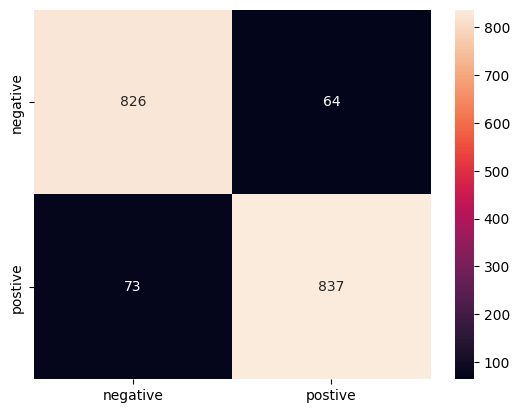

In [34]:
# plot confusion matrix
cm = confusion_matrix(y_train,preds)

classes = ['negative','postive']
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
ax = sns.heatmap(df_cm, annot=True,fmt='g')


The transformer perform better than classic ML